In [2]:
import numpy as np

import skfuzzy as fuzz

import skfuzzy.membership as mf
import matplotlib.pyplot as plt

In [3]:
x_CPU = np.arange(0, 100, 1)##cpu kullanımı
x_tem = np.arange(10, 90, 1)##sıcaklık
x_fan = np.arange(25, 100, 1)##fan hızı

In [4]:
cpu_low = mf.trimf(x_CPU, [0, 40, 50])
cpu_med = mf.trimf(x_CPU, [40, 70, 75])
cpu_hig = mf.trimf(x_CPU, [70, 100, 100])

fan_low = mf.trimf(x_fan, [0,25,50 ])
fan_med = mf.trimf(x_fan, [40,65, 75])
fan_hig = mf.trimf(x_fan, [60, 100, 100])

tem_low = mf.trimf(x_tem, [0, 30, 45])
tem_med = mf.trimf(x_tem, [40, 70, 75])
tem_hig = mf.trimf(x_tem, [70, 85, 85])


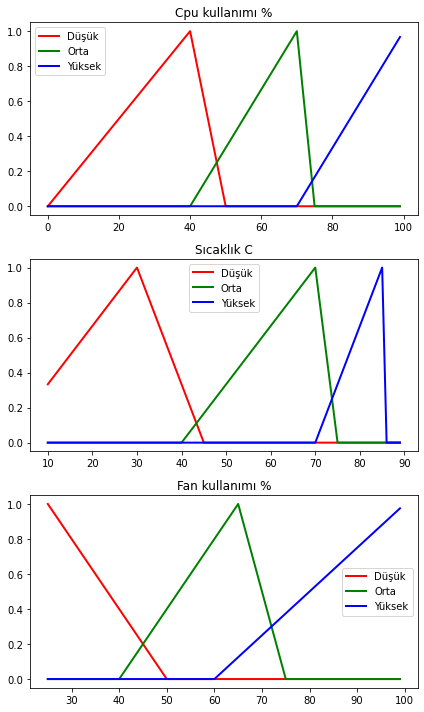

In [5]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows =3,figsize=(6, 10))

ax0.plot(x_CPU, cpu_low, 'r', linewidth= 2, label= 'Düşük')
ax0.plot(x_CPU, cpu_med, 'g', linewidth= 2, label= 'Orta')
ax0.plot(x_CPU, cpu_hig, 'b', linewidth= 2, label= 'Yüksek')

ax0.set_title('Cpu kullanımı %')

ax0.legend()

ax1.plot(x_tem, tem_low, 'r', linewidth= 2, label= 'Düşük')
ax1.plot(x_tem, tem_med, 'g', linewidth= 2, label= 'Orta')
ax1.plot(x_tem, tem_hig, 'b', linewidth= 2, label= 'Yüksek')

ax1.set_title('Sıcaklık C')
ax1.legend()

ax2.plot(x_fan, fan_low, 'r', linewidth= 2, label= 'Düşük')
ax2.plot(x_fan, fan_med, 'g', linewidth= 2, label= 'Orta')
ax2.plot(x_fan, fan_hig, 'b', linewidth= 2, label= 'Yüksek')

ax2.set_title('Fan kullanımı %')
ax2.legend()

plt.tight_layout()

In [6]:
input_Cpu =52
input_sıcaklık=57

In [7]:
cpu_fit_low = fuzz.interp_membership(x_CPU, cpu_low, input_Cpu)
cpu_fit_med = fuzz.interp_membership(x_CPU, cpu_med, input_Cpu)
cpu_fit_hig = fuzz.interp_membership(x_CPU, cpu_hig, input_Cpu)

tem_fit_low = fuzz.interp_membership(x_tem, tem_low, input_sıcaklık)
tem_fit_med = fuzz.interp_membership(x_tem, tem_med, input_sıcaklık)
tem_fit_hig = fuzz.interp_membership(x_tem, tem_hig, input_sıcaklık)



In [8]:
rule1 = np.fmin(np.fmax(cpu_fit_low, tem_fit_low),fan_low)
rule2 = np.fmin(np.fmax(cpu_fit_low, tem_fit_med),fan_med)
rule3 = np.fmin(np.fmax(cpu_fit_low, tem_fit_hig),fan_hig)

rule4 = np.fmin(np.fmax(cpu_fit_med, tem_fit_low),fan_med)
rule5 = np.fmin(np.fmax(cpu_fit_med, tem_fit_med),fan_med)
rule6 = np.fmin(np.fmax(cpu_fit_med, tem_fit_hig),fan_hig)

rule7 = np.fmin(np.fmax(cpu_fit_hig, tem_fit_med),fan_hig)
rule8 = np.fmin(np.fmax(cpu_fit_hig, tem_fit_med),fan_hig)
rule9 = np.fmin(np.fmax(cpu_fit_hig, tem_fit_hig),fan_hig)



In [9]:
out_fan_low= rule1
out_fan_meg=np.fmax(rule2, rule4, rule5)
out_fan_hig=np.fmax(rule3, rule6, np.fmax(rule7, rule8, rule9))

Text(0.5, 1.0, 'fan kullanımı')

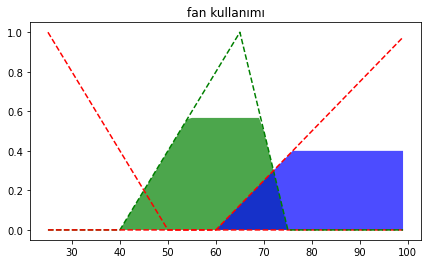

In [10]:
fan = np.zeros_like(x_fan)

fig, ax0 = plt.subplots(figsize=(7,4))

ax0.fill_between(x_fan,fan,out_fan_low, facecolor='r',alpha=0.7)
ax0.plot(x_fan,fan_low ,'r',linestyle='--')

ax0.fill_between(x_fan,fan,out_fan_meg, facecolor='g',alpha=0.7)
ax0.plot(x_fan,fan_med ,'g',linestyle='--')

ax0.fill_between(x_fan,fan,out_fan_hig, facecolor='b',alpha=0.7)
ax0.plot(x_fan,fan_hig ,'r',linestyle='--')

ax0.set_title('fan kullanımı')

In [17]:
out_fan=  np. fmax(out_fan_low, out_fan_meg,out_fan_hig)
defuzzified = fuzz.defuzz(x_fan, out_fan, 'centroid')
result = fuzz.interp_membership(x_fan, out_fan, defuzzified)
print(result)
##referasn çalışma
##https://medium.com/deep-learning-turkiye/python-ile-bulan%C4%B1k-mant%C4%B1k-modellemesi-74459dc27308

0.5666666666666667


In [18]:
##result değeri grafikteki ağırlık merkezi değeridir.
##fan için yüzde 60 orta yüzde 40 yüksek kullanımı sonuçlamıştır.